### Machine Learning
####  1  Supervised Learning 
#####   Regression (predict value)
#####   Classification (predict label)
####  2 Unsupervised Learning 
- #####    Clustering 
- #####    Dimensionality reduction 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits() # load digits dataset (bundled with sklearn for learning / testing purpose)

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
print(digits['DESCR'])

print(digits.data.shape)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
print(type(digits.images))

<class 'numpy.ndarray'>


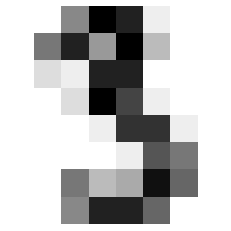

In [4]:
## visualize the data set
import matplotlib.pyplot as plt


dig_img = digits.images[3]
plt.axis('off')
plt.imshow(dig_img, cmap='binary') # imshow - display data as image

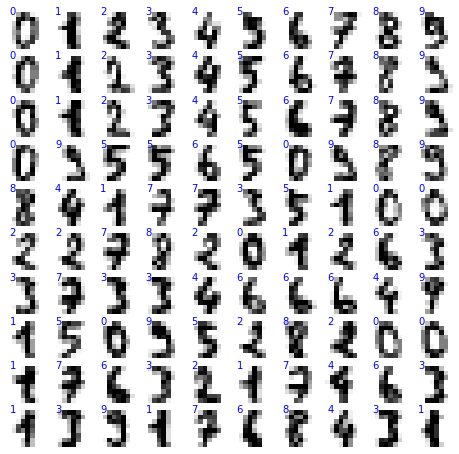

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8)) # print first 100 digits

for i, ax in enumerate(axes.flat):
    dig_img = digits.images[i]
    ax.axis('off')
    ax.text(0, 0, digits.target[i], color='blue')
    ax.imshow(dig_img, cmap='binary')

#### Split the data into Training set & Testing set
- Training set for training
- Testing set for performance evaluation

In [7]:
X, y = digits.data, digits.target

In [8]:
# divide the data into TRAINING SET AND TESTING SET
# TRAINING SET is for training / learning / fit
# TESTING SET is for checking the accuracy of prediction

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
%%time
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, random_state=0)
svc.fit(X_train, y_train)  

CPU times: total: 31.2 ms
Wall time: 27.1 ms


SVC(C=1, kernel='linear', random_state=0)

In [10]:
svc_pred = svc.predict(X_test) # this is slow of large amount of data

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svc_pred) # TEST SET accuracy

0.9844444444444445

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, svc_pred))

# support: # of true sample of this class
# precision: tp / (tp + fp) 
# recall: tp / (tp + fn)
# f1-score: 2 * (precision * recall) / (precision + recall) => weighted average of the precision and recall

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        41
           3       0.98      0.98      0.98        52
           4       1.00      1.00      1.00        47
           5       0.95      0.97      0.96        39
           6       1.00      1.00      1.00        43
           7       1.00      0.98      0.99        48
           8       0.95      0.97      0.96        37
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



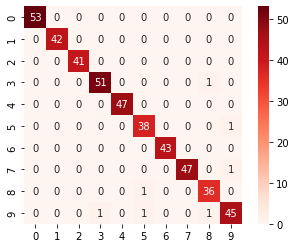

In [13]:
##### Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svc_pred)

res = sns.heatmap(conf_mat, square=True, annot=True, fmt='d',cmap='Reds')

#### Cross Validation
- k-fold CV - Randomly split the data into k equal parts and use 1 part as a validation set at a time to check the performance of that run
- Repeat K times to get the average score of runs

In [15]:
# K-fold validation

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10) 

print(scores.mean())
scores

0.9829408512990602


array([0.97037037, 0.97037037, 0.97037037, 0.97777778, 0.99259259,
       0.99259259, 0.98518519, 0.98507463, 0.99253731, 0.99253731])

In [16]:
from sklearn.model_selection import cross_validate
knn = KNeighborsClassifier()

cv_results = cross_validate(knn, X_train, y_train, scoring='accuracy', cv=10)

print(cv_results.keys())
print('Fit time:' + str(cv_results['fit_time']))  # fit time of each split 
print('Score time:' + str(cv_results['score_time'])) # score time of each split
print('Accuracy: ' + str(cv_results['test_score'])) # score of each split

dict_keys(['fit_time', 'score_time', 'test_score'])
Fit time:[0.00084853 0.00099874 0.00099707 0.00099587 0.00099802 0.0010252
 0.00099707 0.         0.         0.        ]
Score time:[0.00801563 0.0069809  0.00797939 0.01595926 0.01196647 0.0099442
 0.00463796 0.01564956 0.         0.02184725]
Accuracy: [0.97037037 0.97037037 0.97037037 0.97777778 0.99259259 0.99259259
 0.98518519 0.98507463 0.99253731 0.99253731]


### hyperparameters tuning
- there are many combinations
- use cross validation
- it could be slow!

**GridSearchCV**

In [23]:
# KNeighborsClassifier(n_neighbors=3)

from sklearn.model_selection import GridSearchCV
params = [
    {'n_neighbors':range(2,21),
     'weights':['uniform','distance'],},  # 19*2=38 combinations
]

# weights: weight function used in prediction
# Possible values: ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
#                  ‘distance’ : weight points by the inverse of their distance 



clf = KNeighborsClassifier()
search_cv = GridSearchCV(clf, params, cv=5, scoring='accuracy', return_train_score=True)
search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(2, 21),
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [24]:
search_cv.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [25]:
print("GridSearchCV results:\n")
for i, (mean, params) in enumerate(zip(search_cv.cv_results_['mean_test_score'], search_cv.cv_results_['params'])):
    if search_cv.best_score_ == mean:
        print(f' {i+1:2} * {mean:10.5f}, {params}')
    else:
        print(f' {i+1:2}   {mean:10.5f}, {params}')  

GridSearchCV results:

  1      0.97848, {'n_neighbors': 2, 'weights': 'uniform'}
  2 *    0.98442, {'n_neighbors': 2, 'weights': 'distance'}
  3      0.98294, {'n_neighbors': 3, 'weights': 'uniform'}
  4      0.98368, {'n_neighbors': 3, 'weights': 'distance'}
  5      0.98071, {'n_neighbors': 4, 'weights': 'uniform'}
  6      0.98368, {'n_neighbors': 4, 'weights': 'distance'}
  7      0.98145, {'n_neighbors': 5, 'weights': 'uniform'}
  8      0.98294, {'n_neighbors': 5, 'weights': 'distance'}
  9      0.97700, {'n_neighbors': 6, 'weights': 'uniform'}
 10      0.98220, {'n_neighbors': 6, 'weights': 'distance'}
 11      0.97700, {'n_neighbors': 7, 'weights': 'uniform'}
 12      0.97848, {'n_neighbors': 7, 'weights': 'distance'}
 13      0.97774, {'n_neighbors': 8, 'weights': 'uniform'}
 14      0.97922, {'n_neighbors': 8, 'weights': 'distance'}
 15      0.97551, {'n_neighbors': 9, 'weights': 'uniform'}
 16      0.97699, {'n_neighbors': 9, 'weights': 'distance'}
 17      0.97402, {'n_nei

#### __GridSearchCV (another example)__

In [26]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = [
    {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] }, # which kernel perform better (with default hyperparams)
]

model = SVC()

search_cv = GridSearchCV(model, params, cv=5, scoring='accuracy', return_train_score=True)
search_cv.fit(X_train, y_train)

# print scores of each param
print("GridSearchCV results:\n")
for i, (mean, params) in enumerate(zip(search_cv.cv_results_['mean_test_score'], search_cv.cv_results_['params'])):
    if search_cv.best_score_ == mean:
        print(f' {i+1:2} * {mean:10.5f}, {params}')
    else:
        print(f' {i+1:2}   {mean:10.5f}, {params}')    

GridSearchCV results:

  1      0.97700, {'kernel': 'linear'}
  2      0.98441, {'kernel': 'rbf'}
  3 *    0.98739, {'kernel': 'poly'}
  4      0.91019, {'kernel': 'sigmoid'}
CPU times: total: 1.75 s
Wall time: 1.75 s


##### __RandomizedSearchCV__

In [27]:
%%time
from sklearn.model_selection import RandomizedSearchCV
params = [
    {'n_neighbors':range(2,21), 
     'weights':['uniform','distance'],},  # ? combinations
]

clf = KNeighborsClassifier()
# n_iter -> just randomly pick n combinations for evaluation! (default = 10)
search_rand = RandomizedSearchCV(clf, params, cv=5, n_iter=10, scoring='accuracy', return_train_score=True)
search_rand.fit(X_train, y_train)

CPU times: total: 16.2 s
Wall time: 2.71 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': range(2, 21),
                                         'weights': ['uniform', 'distance']}],
                   return_train_score=True, scoring='accuracy')

In [28]:
search_rand.best_estimator_

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [29]:
print("RandomizeSearchCV results:\n")
for i, (mean, params) in enumerate(zip(search_rand.cv_results_['mean_test_score'], search_rand.cv_results_['params'])):
    if search_rand.best_score_ == mean:
        print(f' {i+1:2} * {mean:10.5f}, {params}')
    else:
        print(f' {i+1:2}   {mean:10.5f}, {params}')    

RandomizeSearchCV results:

  1      0.96512, {'weights': 'uniform', 'n_neighbors': 14}
  2      0.96216, {'weights': 'uniform', 'n_neighbors': 17}
  3      0.98145, {'weights': 'uniform', 'n_neighbors': 5}
  4      0.97774, {'weights': 'uniform', 'n_neighbors': 8}
  5      0.97625, {'weights': 'distance', 'n_neighbors': 10}
  6      0.96809, {'weights': 'uniform', 'n_neighbors': 13}
  7      0.96438, {'weights': 'distance', 'n_neighbors': 18}
  8      0.97699, {'weights': 'distance', 'n_neighbors': 9}
  9      0.97848, {'weights': 'distance', 'n_neighbors': 7}
 10 *    0.98220, {'weights': 'distance', 'n_neighbors': 6}
